In [1]:
import pandas as pd

# COVID-19

### CSSE data

In [2]:
# Read
csse_ts = pd.read_csv('data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
# Nvm these
csse_ts = csse_ts.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [4]:
# Pivot and sort
csse_ts = csse_ts.pivot_table(index='Country/Region').rename_axis(None).sort_index().T

In [5]:
csse_ts.index.name = 'Date_Confirmed' # name rows
csse_ts.reset_index(inplace=True) # set index

In [6]:
# Set date and sort
csse_ts = csse_ts.set_index(pd.DatetimeIndex(csse_ts['Date_Confirmed'])).sort_index()

In [7]:
# Resample for daily mean (if needed)
csse_ts = csse_ts.resample('1D').mean().round()

In [8]:
# Calculate delta (increase) of daily cases
csse_daily = csse_ts.diff().fillna(0).reset_index()

In [9]:
csse_daily

,Date_Confirmed,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2020-04-09,40.0,9.0,94.0,19.0,0.0,0.0,80.0,40.0,13.0,...,399.0,32.0,37.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0
79,2020-04-10,37.0,7.0,95.0,18.0,0.0,0.0,180.0,16.0,13.0,...,794.0,17.0,42.0,0.0,2.0,4.0,0.0,1.0,1.0,2.0
80,2020-04-11,34.0,17.0,64.0,0.0,0.0,2.0,0.0,30.0,11.0,...,479.0,21.0,143.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0
81,2020-04-12,52.0,13.0,89.0,37.0,0.0,0.0,167.0,46.0,1.0,...,485.0,-14.0,98.0,6.0,4.0,22.0,2.0,0.0,3.0,0.0


### Export

In [10]:
csse_ts.to_csv('output_data/time_series/ts_world_covid19.csv', index=True)
csse_daily.to_csv('output_data/time_series/delta_world_covid19.csv', index=False)

### Plots

In [11]:
from numpy import *
import math
import matplotlib.pyplot as plt

In [12]:
# Show all countries
# csse_ts.columns.values 

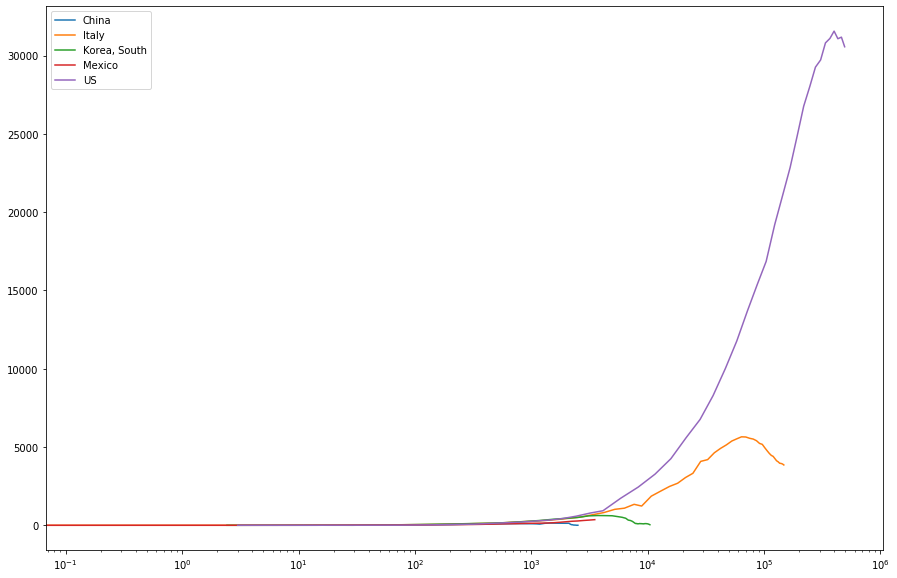

In [15]:
plt.figure(figsize=(15,10))

for state in ['China', 'Italy', 'Korea, South', 'Mexico', 'US']:
    plt.plot(list(csse_ts[state].dropna().rolling(window=7).mean()), list(csse_daily[state].dropna().rolling(window=7).mean()), label=state)

plt.legend()
plt.yscale('linear')
plt.xscale('log')

plt.show()